# Import Testing Data

In [1]:
from Class.data import Data

CLASS_NAMES = ['MALADE', 'SAIN']
FOLDER = "epochs_10"

data_test = Data("test")
# data_train = Data("train")

Test Shape: (624, 172, 364, 1)


# Import Pretrained Models

In [2]:
from tensorflow.keras.models import load_model
from IPython.display import clear_output
import os

modelList = []
for fold in os.listdir('./saved_models/'):
    m = load_model('./saved_models/' + fold)
    modelList.append([m, fold])
    print("Imported: {}/{}".format(len(modelList), len(os.listdir('./saved_models/'))))
    clear_output(wait=True)
print("Import OK")

Import OK


# Compare Models

In [3]:
max_value = 0
i = 1
max_index = 0
max_name = ""
for model in modelList:
    print("{}/{} - {}".format(i, len(modelList), model[1]), end=" - ")
    loss, acc = model[0].evaluate(data_test.x_test, data_test.y_test, verbose=2)
    if (acc > max_value):
        max_value = acc
        max_name = model[1]
        max_index = i - 1
    i += 1

    # print(model[1] + ' - Accuracy: {:5.2f}%'.format(100 * acc))
print("Max accuracy: {:5.2f}%".format(max_value * 100))
print("Best model: {} at index: {}".format(max_name, max_index))

1/30 - 5_avg_elu - 20/20 - 3s - loss: 0.7871 - accuracy: 0.7612
2/30 - 5_max_relu - 20/20 - 2s - loss: 2.2124 - accuracy: 0.6971
3/30 - 5_avg_relu - 20/20 - 2s - loss: 0.9032 - accuracy: 0.8045
4/30 - 20_avg_relu_sigmoid - 20/20 - 3s - loss: 4.5684 - accuracy: 0.7821
5/30 - 10_max_relu - 20/20 - 2s - loss: 2.2396 - accuracy: 0.7676
6/30 - 15_avg_elu - 20/20 - 3s - loss: 0.9317 - accuracy: 0.7596
7/30 - 20_avg_relu - 20/20 - 3s - loss: 2.6498 - accuracy: 0.7500
8/30 - 10_max_relu_sigmoid - 20/20 - 2s - loss: 1.6936 - accuracy: 0.7837
9/30 - 5_max_elu - 20/20 - 2s - loss: 0.9138 - accuracy: 0.7372
10/30 - 15_avg_relu - 20/20 - 3s - loss: 5.0048 - accuracy: 0.7003
11/30 - 50_avg_elu - 20/20 - 3s - loss: 4.4309 - accuracy: 0.7436
12/30 - 20_max_relu_sigmoid - 20/20 - 2s - loss: 4.5930 - accuracy: 0.7532
13/30 - 50_max_elu - 20/20 - 2s - loss: 0.6816 - accuracy: 0.6250
14/30 - 50_max_relu - 20/20 - 2s - loss: 4.8965 - accuracy: 0.7885
15/30 - 10_avg_elu - 20/20 - 3s - loss: 0.9500 - accurac

# MISC

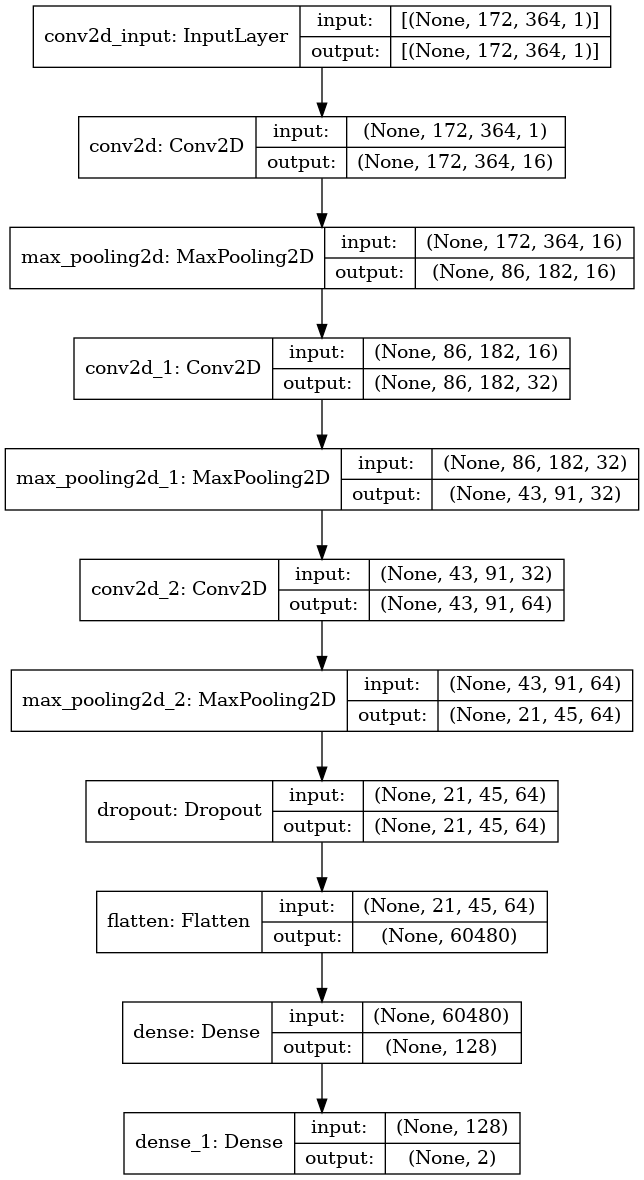

In [5]:
from tensorflow.keras.utils import plot_model

model = modelList[max_index][0]
plot_model(model, to_file='v1_plot_model.png', show_shapes=True)
# from Class.data import Data

# data_train = Data("train")

# max_value = 0
# i = 1
# max_name = ""
# for model in modelList:
#     print("{} - {}/{}".format(model[1], i, len(modelList)))
#     loss, acc = model[0].evaluate(data_train.x_train, data_train.y_train, verbose=2)
#     if (acc > max_value):
#         max_value = acc
#         max_name = model[1]
#     i += 1

#     # print(model[1] + ' - Accuracy: {:5.2f}%'.format(100 * acc))
# print("Max accuracy: {:5.2f}%".format(max_value * 100))
# print("Best model: {}".format(max_name))

In [5]:
# loss, acc = model.evaluate(data_train.x_train, data_train.y_train, verbose=2)

# print('Restored model, train accuracy: {:5.2f}%'.format(100 * acc))
# print(model.predict(data_train.x_train).shape)

In [19]:
import matplotlib.pyplot as plt
from random import randint
from tensorflow import nn
import numpy as np

error = 0
modelList[max_index][0].evaluate(data_test.x_test, data_test.y_test, verbose=2)

for i in range(data_test.x_test.shape[0]):
    # image_index = randint(0, x_test.shape[0] -1)
    image_index = i

    pred = modelList[max_index][0].predict(data_test.x_test[image_index].reshape(1, data_test.x_test[image_index].shape[0], data_test.x_test[image_index].shape[1], 1))
    score = nn.softmax(pred[0])
    value = np.argmax(score)
    res = CLASS_NAMES[value]

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(res, 100 * np.max(score))
    )
    
    if not int(data_test.y_test[image_index]) == int(value):
        error += 1

print("Total errors: " + str(error))
print("%: " + str(((error / data_test.x_test.shape[0]) * 100)))

ADE with a 73.11 percent confidence.
This image most likely belongs to MALADE with a 73.11 percent confidence.
This image most likely belongs to MALADE with a 73.11 percent confidence.
This image most likely belongs to MALADE with a 73.11 percent confidence.
This image most likely belongs to MALADE with a 73.11 percent confidence.
This image most likely belongs to MALADE with a 73.11 percent confidence.
This image most likely belongs to MALADE with a 73.11 percent confidence.
This image most likely belongs to MALADE with a 73.11 percent confidence.
This image most likely belongs to MALADE with a 73.11 percent confidence.
This image most likely belongs to MALADE with a 73.11 percent confidence.
This image most likely belongs to MALADE with a 73.11 percent confidence.
This image most likely belongs to MALADE with a 72.86 percent confidence.
This image most likely belongs to MALADE with a 73.11 percent confidence.
This image most likely belongs to MALADE with a 73.11 percent confidence.
T